# How are in-demand skills trending for Data Scientists?

- Track how often the most common skills appear over time in Data Scientist job postings.

- Time is bucketed by quarter using job_posted_date, and skill likelihood is reported among postings with captured (non-empty) skills.

## Import Libraries and Data

In [15]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('E:/Projects/Python_Data_Project/job_postings_flat_cleaned.csv')

## Filter Data Scientist postings and prepare quarterly skill data

Filter to Data Scientist postings, create a quarterly time bucket, keep only postings with non-empty skills, and explode skills into one row per skill mention.

In [16]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_DS = df[(df['job_title_short'] == 'Data Scientist')].copy()

df_DS['job_posted_quarter'] = df_DS['job_posted_date'].dt.to_period('Q').astype(str)

mask_skills = df_DS['job_skills'].apply(lambda x: isinstance(x, list) and len(x) > 0)
df_DS_explode = df_DS[mask_skills].explode('job_skills')

### Pivot in Prep for Plotting

Convert the exploded dataset into a quarter × skill table with skill counts per quarter.

In [17]:
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_quarter', columns='job_skills',  aggfunc='size', fill_value=0)

df_DS_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_quarter,,,,,,,,,,,,,,,,,,,,,
2023Q1,1056,8,619,212,2,126,17,30,16,42,...,0,447,24,1509,1,3,1,0,63,88
2023Q2,809,23,418,161,4,95,26,19,16,38,...,0,449,11,1149,0,3,0,2,44,79
2023Q3,943,16,530,175,2,88,32,14,37,29,...,0,475,7,1193,0,0,6,1,77,86
2023Q4,876,14,389,137,3,112,18,12,23,17,...,1,386,7,1099,1,2,21,1,60,89
2024Q1,799,13,277,131,2,91,6,21,13,24,...,0,290,9,857,0,1,1,0,21,72
2024Q2,684,7,273,110,0,65,7,9,19,11,...,0,223,4,670,1,3,0,1,21,70
2024Q3,253,0,145,35,0,37,1,3,3,2,...,0,101,6,258,0,0,0,1,6,29
2024Q4,237,7,126,45,1,26,6,5,11,5,...,0,76,8,209,0,0,1,0,7,39
2025Q1,508,6,195,77,2,60,5,9,4,13,...,0,141,9,442,0,0,5,1,21,58


### Sort columns by count

Sort skills by total frequency across the full period to focus on the most common skills.

In [18]:
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[
    df_DS_pivot.loc['Total'].sort_values(ascending=False).index
]
df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot

job_skills,python,sql,r,aws,tableau,azure,spark,tensorflow,excel,power bi,...,huggingface,dingtalk,mattermost,suse,nuxt.js,esquisse,sqlserver,deno,google chat,wimi
job_posted_quarter,,,,,,,,,,,,,,,,,,,,,
2023Q1,30433,21207,16305,6927,7794,5612,6777,4867,4699,3992,...,0,0,0,0,0,1,0,0,0,0
2023Q2,24754,17152,13204,5728,6662,4513,5333,4088,3752,3589,...,0,0,0,0,0,1,0,0,0,0
2023Q3,27138,19145,14250,6271,7067,5327,5841,4633,4289,3849,...,3,0,0,0,0,0,0,0,0,0
2023Q4,24451,16701,12031,5731,5941,4869,4812,4357,3816,3329,...,0,0,1,0,1,0,1,0,0,1
2024Q1,21323,14517,10215,5236,5123,4646,4191,4031,3041,3046,...,1,1,0,0,1,0,0,0,0,0
2024Q2,18103,12295,8581,4590,3996,3958,3674,3613,2282,2441,...,0,1,2,1,1,0,0,0,0,0
2024Q3,7419,4955,3568,1931,1771,1562,1562,1552,947,1038,...,0,1,0,0,0,0,0,0,0,0
2024Q4,6485,4778,3116,1923,1732,1560,1399,1345,1091,1151,...,0,0,0,1,0,0,1,0,0,0
2025Q1,12377,9005,5074,3333,2909,3006,2311,2180,2218,2358,...,0,0,0,0,0,0,0,0,0,0


## Calculate skill likelihood (%) among postings with skills

Convert quarterly skill counts into percentages using postings with captured skills as the denominator, and report skills coverage by quarter.

In [19]:
DS_totals_all = df_DS.groupby('job_posted_quarter').size()
DS_totals_with_skills = df_DS[mask_skills].groupby('job_posted_quarter').size()

missing_skills_rate = (1 - (DS_totals_with_skills / DS_totals_all)).mul(100).round(1)

print("DS postings per quarter (all):")
display(DS_totals_all)

print("DS postings per quarter (with skills captured):")
display(DS_totals_with_skills)

print("Share of DS postings with missing/empty job_skills (%):")
display(missing_skills_rate)

DS postings per quarter (all):


job_posted_quarter
2023Q1    44981
2023Q2    36505
2023Q3    42067
2023Q4    38889
2024Q1    32280
2024Q2    26456
2024Q3    10900
2024Q4    10651
2025Q1    26506
2025Q2    16979
2025Q3    13369
2025Q4    12450
dtype: int64

DS postings per quarter (with skills captured):


job_posted_quarter
2023Q1    38557
2023Q2    31352
2023Q3    35226
2023Q4    32178
2024Q1    27406
2024Q2    22638
2024Q3     9324
2024Q4     8556
2025Q1    18090
2025Q2    11967
2025Q3    10208
2025Q4     9123
dtype: int64

Share of DS postings with missing/empty job_skills (%):


job_posted_quarter
2023Q1    14.3
2023Q2    14.1
2023Q3    16.3
2023Q4    17.3
2024Q1    15.1
2024Q2    14.4
2024Q3    14.5
2024Q4    19.7
2025Q1    31.8
2025Q2    29.5
2025Q3    23.6
2025Q4    26.7
dtype: float64

In [20]:
df_DS_percent = df_DS_pivot.iloc[:12].div(DS_totals_with_skills/100, axis=0)

df_DS_percent = df_DS_percent.reset_index()

df_DS_percent['job_posted_quarter'] = df_DS_percent['job_posted_quarter'].apply(
    lambda q: f"Q{q[-1]} {q[:4]}"
)

df_DS_percent = df_DS_percent.set_index('job_posted_quarter')

df_DS_percent

job_skills,python,sql,r,aws,tableau,azure,spark,tensorflow,excel,power bi,...,huggingface,dingtalk,mattermost,suse,nuxt.js,esquisse,sqlserver,deno,google chat,wimi
job_posted_quarter,,,,,,,,,,,,,,,,,,,,,
Q1 2023,78.929896,55.001686,42.288041,17.965609,20.214228,14.555074,17.576575,12.622870,12.187151,10.353503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002594,0.000000,0.000000,0.000000,0.000000
Q2 2023,78.955091,54.707834,42.115336,18.269967,21.249043,14.394616,17.010079,13.039041,11.967339,11.447436,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003190,0.000000,0.000000,0.000000,0.000000
Q3 2023,77.039687,54.349060,40.453074,17.802192,20.061886,15.122353,16.581502,13.152217,12.175666,10.926588,...,0.008516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q4 2023,75.986699,51.901921,37.388899,17.810305,18.462925,15.131456,14.954317,13.540307,11.859034,10.345578,...,0.000000,0.000000,0.003108,0.000000,0.003108,0.000000,0.003108,0.000000,0.000000,0.003108
Q1 2024,77.804130,52.970153,37.272860,19.105305,18.692987,16.952492,15.292272,14.708458,11.096110,11.114355,...,0.003649,0.003649,0.000000,0.000000,0.003649,0.000000,0.000000,0.000000,0.000000,0.000000
Q2 2024,79.967312,54.311335,37.905292,20.275643,17.651736,17.483877,16.229349,15.959890,10.080396,10.782755,...,0.000000,0.004417,0.008835,0.004417,0.004417,0.000000,0.000000,0.000000,0.000000,0.000000
Q3 2024,79.568855,53.142428,38.266838,20.709996,18.993994,16.752467,16.752467,16.645217,10.156585,11.132561,...,0.000000,0.010725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q4 2024,75.794764,55.843852,36.418887,22.475456,20.243104,18.232819,16.351099,15.719963,12.751286,13.452548,...,0.000000,0.000000,0.000000,0.011688,0.000000,0.000000,0.011688,0.000000,0.000000,0.000000
Q1 2025,68.419016,49.778883,28.048646,18.424544,16.080708,16.616915,12.775014,12.050857,12.260918,13.034826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot quarterly skill likelihood (among postings with skills)

Plot the top skills’ quarterly likelihood to show which skills are stable and which change over time.

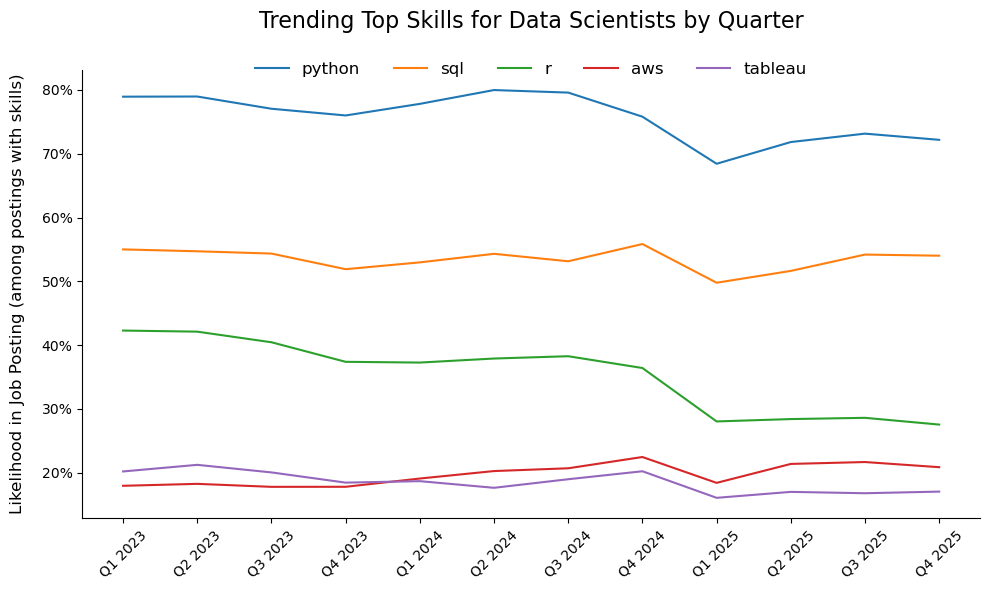

In [21]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DS_percent.iloc[:, :5]

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_plot, dashes=False, palette='tab10', ax=ax)

ax.set_title('Trending Top Skills for Data Scientists by Quarter', fontsize=16, pad=30)
ax.set_ylabel('Likelihood in Job Posting (among postings with skills)', fontsize=12, labelpad=12)
ax.set_xlabel('')

ax.set_xticks(range(len(df_plot.index)))
ax.set_xticklabels(df_plot.index, rotation=45)

ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

ax.legend(
    title=None,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=5,
    frameon=False,
    fontsize=12
)

sns.despine()
plt.tight_layout()
plt.show()